In [4]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from urllib.parse import urlencode
from matplotlib_venn import venn3, venn2
import gseapy as gp

In [8]:
#Obtain API Token
##Add your credentials here
auth_params = {"email":"","password":""}
DISGENET_URL_BASE = 'https://www.disgenet.org/api/'

try:
    response = requests.post(DISGENET_URL_BASE+'/auth/', data=auth_params)
    if(response.status_code == 200):
        #Lets store the api key in a new variable and use it again in new requests
        json_response = response.json()
        API_TOKEN = json_response.get("token")
        print("You are successfully authenticated") #Comment this line if you don't want your API key to show up in the terminal
    else:
        print(response.status_code)
        print(response.text)
except requests.exceptions.RequestException as req_ex:
    print(req_ex)
    print("Something went wrong with the request.")


You are successfully authenticated


In [9]:

#Crohn Disease - C0010346
#Ulcerative Colitis - C0009324
#Crohn's disease of the ileum - C0267380
#Crohn's disease of large bowel - C0156147
#Inflammation of large intestine - C0578878

DISGENET_URL_GDA = 'https://www.disgenet.org/api/gda/disease/'
TOKEN = ''
headers = {'Authorization': f'Bearer {TOKEN}'}

terms = ["C0010346","C0009324", "C0267380", "C0156147", "C0578878"]
url = f'{DISGENET_URL_GDA}{"%2C".join(terms)}'


In [10]:

response = requests.get(url, headers=headers, params={'source':'ALL'})

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
    df.to_csv("./results/disgenet_IBD_genes.csv", index=False)
    df
else:
    print(f"Error: {response.status_code}")

In [11]:
df

,geneid,gene_symbol,uniprotid,gene_dsi,gene_dpi,gene_pli,protein_class,protein_class_name,diseaseid,disease_name,disease_class,disease_class_name,disease_type,disease_semantic_type,score,ei,el,year_initial,year_final,source
0,64127,NOD2,Q9HC29,0.423,0.923,1.983400e-30,DTO_05007624,Enzyme,C0010346,Crohn Disease,C06,Digestive System Diseases,disease,Disease or Syndrome,1.00,0.937,moderate,1998.0,2019.0,ALL
1,149233,IL23R,Q5VWK5,0.466,0.769,5.596100e-04,DTO_05007599,Signaling,C0009324,Ulcerative Colitis,C06,Digestive System Diseases,disease,Disease or Syndrome,0.70,0.982,None,2006.0,2020.0,ALL
2,64127,NOD2,Q9HC29,0.423,0.923,1.983400e-30,DTO_05007624,Enzyme,C0009324,Ulcerative Colitis,C06,Digestive System Diseases,disease,Disease or Syndrome,0.70,0.909,None,1998.0,2019.0,ALL
3,149233,IL23R,Q5VWK5,0.466,0.769,5.596100e-04,DTO_05007599,Signaling,C0010346,Crohn Disease,C06,Digestive System Diseases,disease,Disease or Syndrome,0.70,0.950,None,2006.0,2020.0,ALL
4,3123,HLA-DRB1,P01911,0.333,0.923,1.099700e-03,DTO_05007608,Immune response,C0010346,Crohn Disease,C06,Digestive System Diseases,disease,Disease or Syndrome,0.70,0.880,None,1994.0,2019.0,ALL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,55894,DEFB103B,P81534,0.572,0.731,NaN,None,None,C0267380,Crohn's disease of the ileum,C06,Digestive System Diseases,disease,Disease or Syndrome,0.01,1.000,None,2013.0,2013.0,ALL
2999,6934,TCF7L2,Q9NQB0,0.485,0.846,9.953700e-01,None,None,C0267380,Crohn's disease of the ileum,C06,Digestive System Diseases,disease,Disease or Syndrome,0.01,1.000,None,2008.0,2008.0,ALL
3000,7534,YWHAZ,P63104,0.475,0.846,9.396500e-01,DTO_05007613,Chaperone,C0267380,Crohn's disease of the ileum,C06,Digestive System Diseases,disease,Disease or Syndrome,0.01,1.000,None,1995.0,1995.0,ALL
3001,8398,PLA2G6,O60733,0.476,0.846,2.483700e-10,DTO_05007584,Enzyme modulator,C0267380,Crohn's disease of the ileum,C06,Digestive System Diseases,disease,Disease or Syndrome,0.01,1.000,None,1999.0,1999.0,ALL


In [12]:
geneshot_IBD = pd.read_csv('./results/Pubmed_IBD_genes.csv')
gwas_IBD = pd.read_csv('./data/EFO_0003767_associations_export_IBD.tsv', sep='\t')
Xenium_panel =pd.read_csv('./data/Xenium_hColon_v1_metadata.csv')

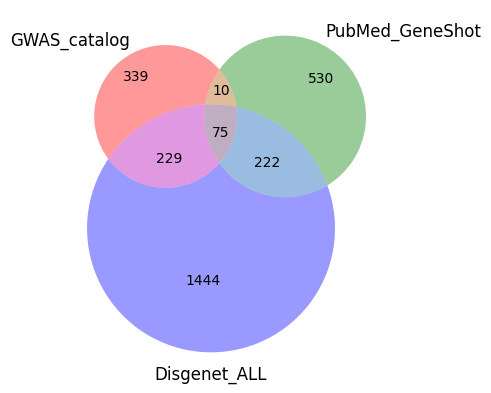

In [13]:
gwas_IBD_genes = set(gwas_IBD["mappedGenes"].str.split(",").str[0])
disgenet_IBD_genes = set(df["gene_symbol"])
pubmed_genes = set(geneshot_IBD["Gene_names"])

venn_diagram = venn3([gwas_IBD_genes, pubmed_genes, disgenet_IBD_genes], set_labels=('GWAS_catalog', 'PubMed_GeneShot', 'Disgenet_ALL'))
plt.show()

In [14]:
common_genes = np.array(list(disgenet_IBD_genes.intersection(gwas_IBD_genes, pubmed_genes)))
np.savetxt('./results/common_IBD_genes.txt', common_genes, fmt='%s')

In [15]:
pubmed_common_genes = geneshot_IBD[geneshot_IBD["Gene_names"].isin(common_genes)]
pubmed_common_genes = pubmed_common_genes.sort_values(by="Pubmed_IDs", ascending=False)
print(pubmed_common_genes["Gene_names"].head(10))

604       NOD2
727    ATG16L1
542      IL23R
762       IRGM
606    TNFSF15
52        IL10
65        TLR4
23       VEGFA
602      PTPN2
51       STAT3
Name: Gene_names, dtype: object


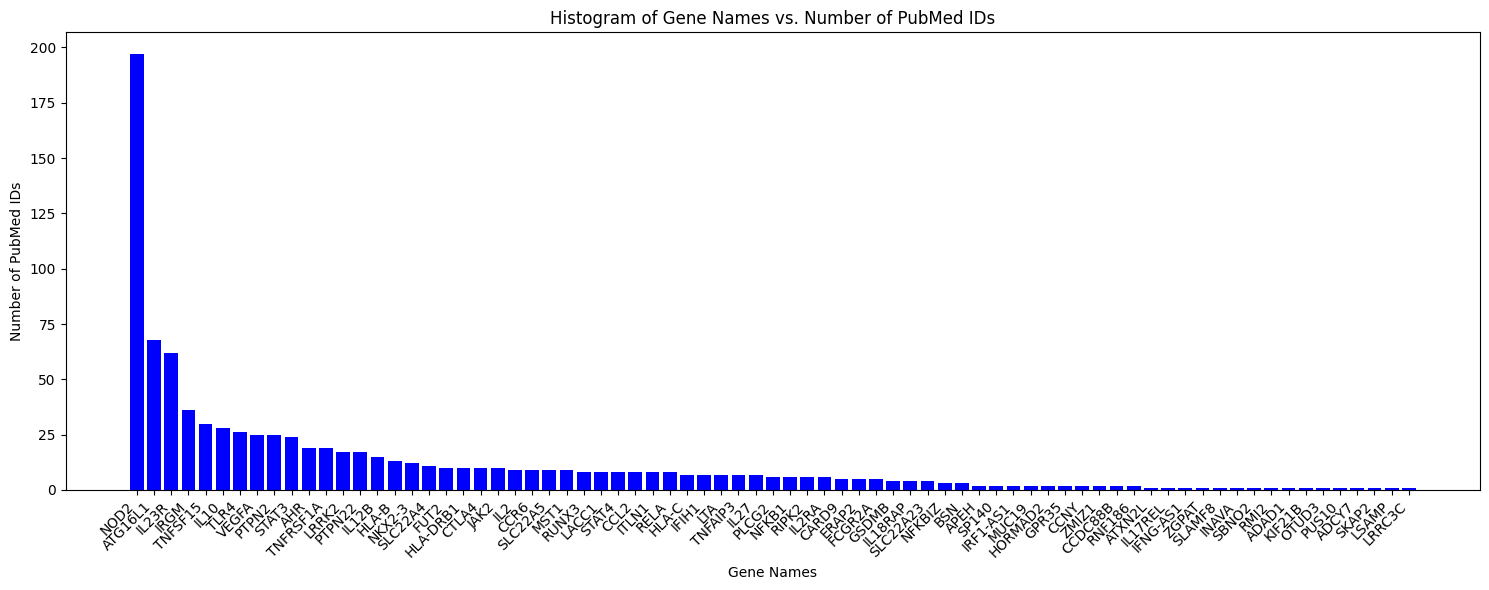

In [16]:
plt.figure(figsize=(15, 6))
plt.bar(pubmed_common_genes["Gene_names"], pubmed_common_genes["Pubmed_IDs"], color='blue')
plt.xlabel('Gene Names')
plt.ylabel('Number of PubMed IDs')
plt.title('Histogram of Gene Names vs. Number of PubMed IDs')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [17]:
df = df.sort_values(by="score", ascending=False)
df_IBD = df.drop_duplicates(subset='gene_symbol', keep='first')
df_IBD = df_IBD.head(100)
df_IBD

,geneid,gene_symbol,uniprotid,gene_dsi,gene_dpi,gene_pli,protein_class,protein_class_name,diseaseid,disease_name,disease_class,disease_class_name,disease_type,disease_semantic_type,score,ei,el,year_initial,year_final,source
0,64127,NOD2,Q9HC29,0.423,0.923,1.983400e-30,DTO_05007624,Enzyme,C0010346,Crohn Disease,C06,Digestive System Diseases,disease,Disease or Syndrome,1.0,0.937,moderate,1998.0,2019.0,ALL
5,345611,IRGM,A1A4Y4,0.617,0.538,NaN,None,None,C0010346,Crohn Disease,C06,Digestive System Diseases,disease,Disease or Syndrome,0.7,0.939,None,2007.0,2020.0,ALL
7,55054,ATG16L1,Q676U5,0.543,0.769,9.645200e-01,None,None,C0010346,Crohn Disease,C06,Digestive System Diseases,disease,Disease or Syndrome,0.7,0.953,None,2001.0,2020.0,ALL
6,3586,IL10,P22301,0.281,0.923,5.887400e-03,None,None,C0010346,Crohn Disease,C06,Digestive System Diseases,disease,Disease or Syndrome,0.7,0.962,strong,1996.0,2020.0,ALL
1,149233,IL23R,Q5VWK5,0.466,0.769,5.596100e-04,DTO_05007599,Signaling,C0009324,Ulcerative Colitis,C06,Digestive System Diseases,disease,Disease or Syndrome,0.7,0.982,None,2006.0,2020.0,ALL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,51738,GHRL,Q9UBU3,0.517,0.769,1.392100e-11,None,None,C0009324,Ulcerative Colitis,C06,Digestive System Diseases,disease,Disease or Syndrome,0.3,1.000,None,2009.0,2009.0,ALL
119,4057,LTF,P02788,0.543,0.846,1.266500e-21,DTO_05007624,Enzyme,C0009324,Ulcerative Colitis,C06,Digestive System Diseases,disease,Disease or Syndrome,0.3,1.000,None,2006.0,2006.0,ALL
118,4046,LSP1,P33241,0.700,0.462,1.472000e-06,None,None,C0009324,Ulcerative Colitis,C06,Digestive System Diseases,disease,Disease or Syndrome,0.3,1.000,None,2011.0,2011.0,ALL
117,3577,CXCR1,P25024,0.508,0.769,3.033700e-07,DTO_02300001,G-protein coupled receptor,C0009324,Ulcerative Colitis,C06,Digestive System Diseases,disease,Disease or Syndrome,0.3,1.000,None,2011.0,2011.0,ALL


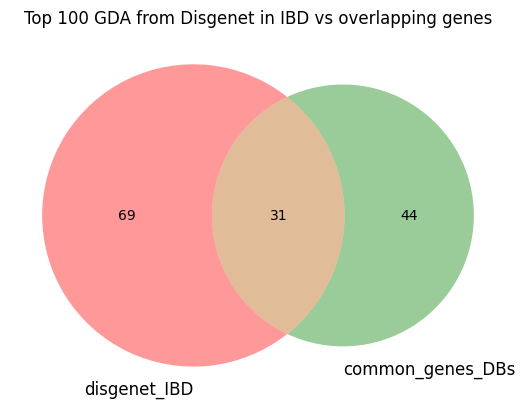

In [18]:
disgenet_crohn_genes = set(df_IBD["gene_symbol"])
common_genes_set = set(common_genes)
venn_diagram = venn2([disgenet_crohn_genes, common_genes_set], set_labels=('disgenet_IBD', 'common_genes_DBs'))
plt.title("Top 100 GDA from Disgenet in IBD vs overlapping genes")
plt.show()

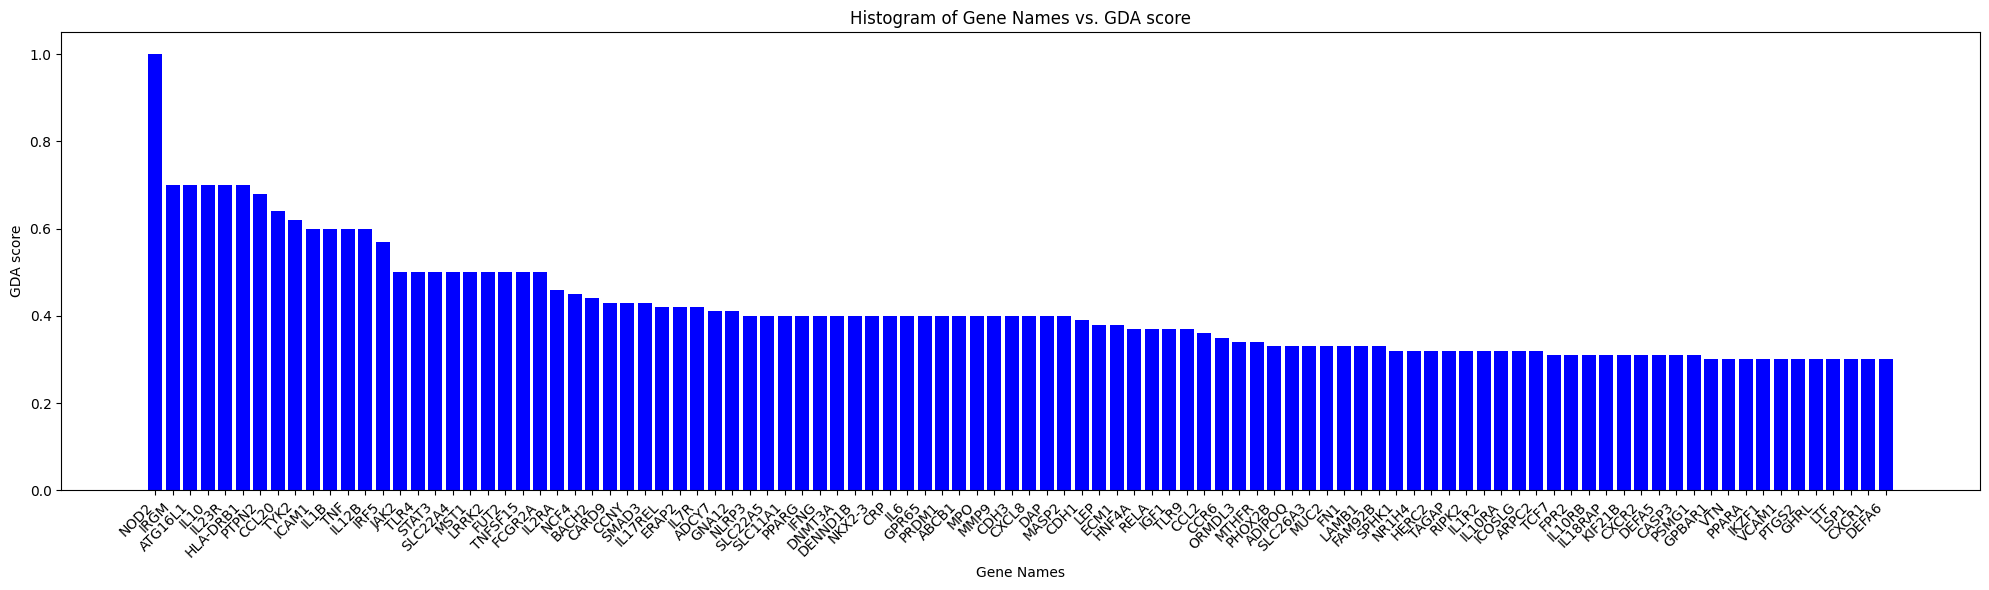

In [19]:
plt.figure(figsize=(20, 6))
plt.bar(df_IBD["gene_symbol"], df_IBD["score"], color='blue')
plt.xlabel('Gene Names')
plt.ylabel('GDA score')
plt.title('Histogram of Gene Names vs. GDA score')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [20]:
disgenet_crohn = pd.read_csv("./data/C0010346_disease_gda_summary.tsv", sep="\t")
disgenet_crohn = disgenet_crohn.sort_values(by="N_PMIDs", ascending=False)
disgenet_crohn = disgenet_crohn.head(100)
disgenet_crohn

,Disease,Disease_id,Gene,Gene_id,UniProt,Gene_Full_Name,Protein_Class,N_diseases_g,DSI_g,DPI_g,pLI,Score_gda,EL_gda,EI_gda,N_PMIDs,N_SNPs_gda,First_Ref,Last_Ref
0,Crohn Disease,C0010346,NOD2,64127,Q9HC29,nucleotide binding oligomerization domain cont...,Enzyme,434,0.423,0.923,1.983400e-30,1.00,moderate,0.937,714,75,1998.0,2019.0
32,Crohn Disease,C0010346,TNF,7124,P01375,tumor necrosis factor,Signaling,2724,0.231,0.962,8.033000e-01,0.40,NaN,0.950,281,5,1996.0,2020.0
5,Crohn Disease,C0010346,ATG16L1,55054,Q676U5,autophagy related 16 like 1,NaN,120,0.543,0.769,9.645200e-01,0.70,NaN,0.953,150,23,2001.0,2020.0
201,Crohn Disease,C0010346,ACAD8,27034,Q9UKU7,acyl-CoA dehydrogenase family member 8,Enzyme,203,0.506,0.885,5.638900e-14,0.10,NaN,0.959,121,0,1983.0,2020.0
1,Crohn Disease,C0010346,IL23R,149233,Q5VWK5,interleukin 23 receptor,Signaling,306,0.466,0.769,5.596100e-04,0.70,NaN,0.950,120,29,2006.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Crohn Disease,C0010346,ZNF365,22891,Q70YC4;Q70YC5,zinc finger protein 365,NaN,60,0.641,0.654,4.676100e-04,0.16,NaN,1.000,8,3,2010.0,2016.0
20,Crohn Disease,C0010346,SMAD3,4088,P84022,SMAD family member 3,Transcription factor,470,0.415,0.923,7.979600e-01,0.43,NaN,1.000,8,3,2010.0,2019.0
350,Crohn Disease,C0010346,MYDGF,56005,Q969H8,myeloid derived growth factor,NaN,295,0.451,0.846,3.492300e-06,0.08,NaN,1.000,8,0,2003.0,2017.0
349,Crohn Disease,C0010346,MMP3,4314,P08254,matrix metallopeptidase 3,Enzyme,473,0.408,0.885,5.736200e-15,0.08,NaN,1.000,8,0,2000.0,2010.0


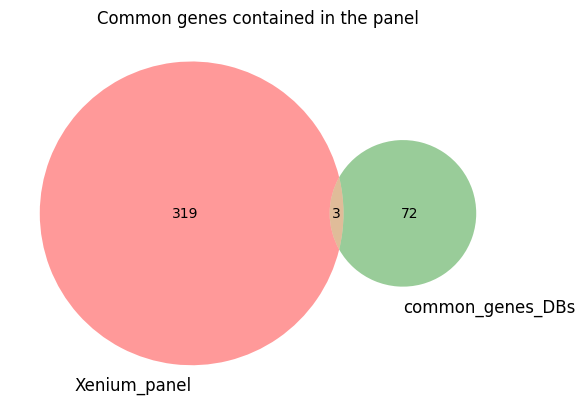

In [24]:
Xenium_panel_genes = set(Xenium_panel["Gene"])
common_genes_set = set(common_genes)

venn_diagram = venn2([Xenium_panel_genes, common_genes_set], set_labels=('Xenium_panel', 'common_genes_DBs'))
plt.title("Common genes contained in the panel")
plt.show()

In [36]:
filtered_disgenet_df_GWAS = df[df['gene_symbol'].isin(gwas_IBD_genes)]
filtered_disgenet_df_GeneShot = df[df['gene_symbol'].isin(pubmed_genes)]

concatenated_df = pd.concat([filtered_disgenet_df_GWAS, filtered_disgenet_df_GeneShot])
unique_df = concatenated_df.drop_duplicates()
unique_df


,geneid,gene_symbol,uniprotid,gene_dsi,gene_dpi,gene_pli,protein_class,protein_class_name,diseaseid,disease_name,disease_class,disease_class_name,disease_type,disease_semantic_type,score,ei,el,year_initial,year_final,source
0,64127,NOD2,Q9HC29,0.423,0.923,1.983400e-30,DTO_05007624,Enzyme,C0010346,Crohn Disease,C06,Digestive System Diseases,disease,Disease or Syndrome,1.00,0.937,moderate,1998.0,2019.0,ALL
1,149233,IL23R,Q5VWK5,0.466,0.769,5.596100e-04,DTO_05007599,Signaling,C0009324,Ulcerative Colitis,C06,Digestive System Diseases,disease,Disease or Syndrome,0.70,0.982,None,2006.0,2020.0,ALL
2,64127,NOD2,Q9HC29,0.423,0.923,1.983400e-30,DTO_05007624,Enzyme,C0009324,Ulcerative Colitis,C06,Digestive System Diseases,disease,Disease or Syndrome,0.70,0.909,None,1998.0,2019.0,ALL
3,149233,IL23R,Q5VWK5,0.466,0.769,5.596100e-04,DTO_05007599,Signaling,C0010346,Crohn Disease,C06,Digestive System Diseases,disease,Disease or Syndrome,0.70,0.950,None,2006.0,2020.0,ALL
4,3123,HLA-DRB1,P01911,0.333,0.923,1.099700e-03,DTO_05007608,Immune response,C0010346,Crohn Disease,C06,Digestive System Diseases,disease,Disease or Syndrome,0.70,0.880,None,1994.0,2019.0,ALL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,4893,NRAS,P01111,0.390,0.808,4.900900e-01,DTO_05007584,Enzyme modulator,C0156147,Crohn's disease of large bowel,C06,Digestive System Diseases,disease,Disease or Syndrome,0.01,1.000,None,2016.0,2016.0,ALL
2975,50616,IL22,Q9GZX6,0.393,0.885,1.884300e-04,None,None,C0156147,Crohn's disease of large bowel,C06,Digestive System Diseases,disease,Disease or Syndrome,0.01,1.000,None,2020.0,2020.0,ALL
2980,673,BRAF,P15056,0.319,0.846,9.999500e-01,DTO_03300101,Kinase,C0156147,Crohn's disease of large bowel,C06,Digestive System Diseases,disease,Disease or Syndrome,0.01,1.000,None,2016.0,2016.0,ALL
2984,7040,TGFB1,P01137,0.287,0.962,3.685000e-02,DTO_05007599,Signaling,C0156147,Crohn's disease of large bowel,C06,Digestive System Diseases,disease,Disease or Syndrome,0.01,1.000,None,2010.0,2010.0,ALL


In [40]:
selected_columns_df = unique_df.iloc[:, :8]
selected_columns_df = selected_columns_df.drop_duplicates()
selected_columns_df.to_csv('./results/Overlapping_genes_alldb.csv', index=False)


In [41]:
selected_columns_df

,geneid,gene_symbol,uniprotid,gene_dsi,gene_dpi,gene_pli,protein_class,protein_class_name
0,64127,NOD2,Q9HC29,0.423,0.923,1.983400e-30,DTO_05007624,Enzyme
1,149233,IL23R,Q5VWK5,0.466,0.769,5.596100e-04,DTO_05007599,Signaling
4,3123,HLA-DRB1,P01911,0.333,0.923,1.099700e-03,DTO_05007608,Immune response
5,345611,IRGM,A1A4Y4,0.617,0.538,NaN,None,None
6,3586,IL10,P22301,0.281,0.923,5.887400e-03,None,None
...,...,...,...,...,...,...,...,...
2890,8740,TNFSF14,O43557,0.529,0.769,5.166300e-02,DTO_05007599,Signaling
2915,9235,IL32,P24001,0.495,0.731,3.747100e-09,None,None
2916,92579,G6PC3,Q9BUM1,0.606,0.731,4.717700e-06,None,None
2924,9340,GLP2R,O95838,0.705,0.269,2.635000e-11,DTO_02300001,G-protein coupled receptor


In [3]:
common_genes = pd.read_csv("../results/Overlapping_genes_alldb.csv")

c:\Users\Brise\AppData\Local\Programs\Python\Python312\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


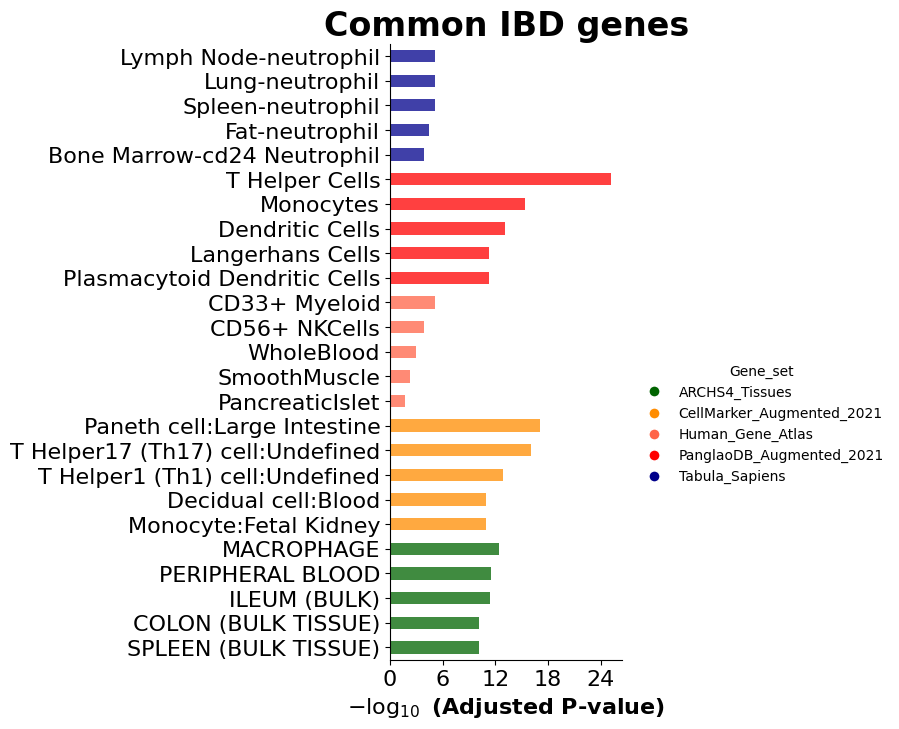

In [8]:
enr = gp.enrichr(gene_list= common_genes["gene_symbol"],
                 gene_sets=['Human_Gene_Atlas','Tabula_Sapiens', 'PanglaoDB_Augmented_2021', 
                            'CellMarker_Augmented_2021','ARCHS4_Tissues'],
                 organism='human',
                 outdir=None,
                )

ax = gp.barplot(enr.results,
              title="Common IBD genes",
              column="Adjusted P-value",
              group='Gene_set',
              size=10,
              top_term=5,
              figsize=(3,8),
              color = {'Human_Gene_Atlas': 'tomato', 
                       'Tabula_Sapiens':'darkblue',
                        'PanglaoDB_Augmented_2021':'red',
                        'CellMarker_Augmented_2021':'darkorange',
                        'ARCHS4_Tissues': 'darkgreen'}
             )